In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


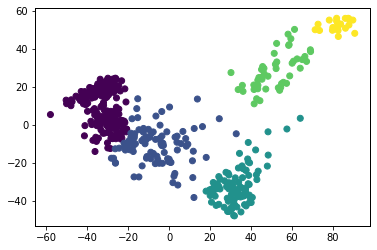

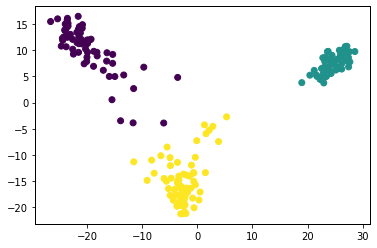

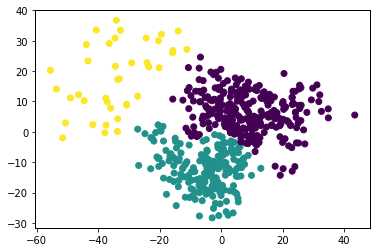

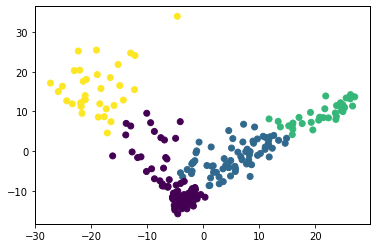

In [2]:
%run -i 'load_data.py'

In [3]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

In [4]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [5]:
from scipy.special import logit
from scipy.special import expit

def mean_confidence_interval(data):
    m = np.median(data)
    #md = np.median(data)
    s = np.std(data)
    ci_up = np.min([m+(1.645*s), 1])
    ci_dn = np.max([m-(1.645*s), 0])
    
    return m, ci_up, ci_dn

In [6]:
def get_curves_dataset(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, 
                       coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5):
    
    int_ = PSI_tab[subpop].loc[np.abs(0.5 - PSI_tab[subpop].mean(axis=1)) <= (0.5-psi_min)]
    PSI_int = int_.loc[int_.isna().mean(axis=1) <= (1-cell_min)]

    curva_list = []
    for exon in PSI_int.index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((PSI_int.loc[exon].dropna() <= (0+i)) | (PSI_int.loc[exon].dropna() >= (1-i))).mean())

        curva_list.append(curva)
#         print(exon)

    filtered_all = process_subpop(subpop, PSI_tab, mrna_counts, 
                                        mrna_per_event, read_counts, coverage_tab['SJ_coverage'], 
                                       psi_min, mrna_min, reads_min = reads_min)

    curva_list_filt = []
    curva_list_unfilt = []
    for exon in filtered_all[0].index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((filtered_all[0].loc[exon].dropna() <= (0+i)) | (filtered_all[0].loc[exon].dropna() >= (1-i))).mean())

        curva_list_filt.append(curva)
        
        
        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((PSI_int.loc[exon].dropna() <= (0+i)) | (PSI_int.loc[exon].dropna() >= (1-i))).mean())

        curva_list_unfilt.append(curva)
#         print(exon)
        
    return curva_list, curva_list_filt, curva_list_unfilt



def plot_bimodality_curves(curva_set, color_list, nameset, linestyles, linestyles2, 
                           alpha_list, title, plot_individual_events = False):

    for i in range(len(curva_set)):
        name = nameset[i]
        lsty = linestyles[i]
        lsty_2 = linestyles2[i]
        curva_list = curva_set[i]
        col = color_list[i]
        alph = alpha_list[i]

#         if plot_individual_events and (i!= 0):
        for curva in curva_list:
            plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c=col, alpha=alph, linestyle=lsty_2)

        mean_list = []
        ci_up_list = []
        ci_dn_list = []

        for i in range(len(curva_list[0])):
            m_list = mean_confidence_interval([x[i] for x in curva_list])

            mean_list.append(m_list[0])
            ci_up_list.append(m_list[1])
            ci_dn_list.append(m_list[2])

        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c=col, linewidth=3, linestyle = lsty) 

#         plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
#                          color=col, alpha=0.1, linewidth=0.0)

    plt.title(title)
    plt.xlabel('$\Psi$ cutoff')
    plt.ylabel('proportion of cells below cutoff')
#     plt.legend(('-', '-', '-'), ('label1', 'label2', 'label3'), loc='lower right', frameon=False)


    colors = color_list
    lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=linestyles2[0]) for c in colors]
    labels = nameset
    plt.legend(lines, labels, loc='lower right', frameon=False)

    
    plt.show()

In [8]:
chen_curva_list_ES2i, chen_curva_list_filt_ES2i, chen_curva_list_unfilt_ES2i = get_curves_dataset(chen_PSI, chen_ES2i, 
                                                                                                  chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_ES, chen_curva_list_filt_ES, chen_curva_list_unfilt_ES = get_curves_dataset(chen_PSI, chen_ES, 
                                                                                            chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_Epi, chen_curva_list_filt_Epi, chen_curva_list_unfilt_Epi = get_curves_dataset(chen_PSI, chen_Epi, 
                                                                                               chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_MN, chen_curva_list_filt_MN, chen_curva_list_unfilt_MN = get_curves_dataset(chen_PSI, chen_MN, 
                                                                                            chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)


In [9]:
song_curva_list_iPSC, song_curva_list_filt_iPSC, song_curva_list_unfilt_iPSC = get_curves_dataset(song_PSI, song_iPSC, 
                                                                                                  song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

song_curva_list_NPC, song_curva_list_filt_NPC, song_curva_list_unfilt_NPC = get_curves_dataset(song_PSI, song_NPC, 
                                                                                               song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

song_curva_list_MN, song_curva_list_filt_MN, song_curva_list_unfilt_MN = get_curves_dataset(song_PSI, song_MN, 
                                                                                            song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)


In [46]:
lescroart_curva_list_E6, lescroart_curva_list_filt_E6, lescroart_curva_list_unfilt_E6 = get_curves_dataset(lescroart_PSI, 
                    lescroart_E6, lescroart_mrna_counts, mrna_per_event_lescroart, lescroart_read_counts, 
                       lescroart_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

lescroart_curva_list_E7, lescroart_curva_list_filt_E7, lescroart_curva_list_unfilt_E7 = get_curves_dataset(lescroart_PSI, 
                    lescroart_E7, lescroart_mrna_counts, mrna_per_event_lescroart, lescroart_read_counts, 
                       lescroart_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

In [50]:
trapnell_curva_list_M00, trapnell_curva_list_filt_M00, trapnell_curva_list_unfilt_M00 = get_curves_dataset(trapnell_PSI, 
                    trapnell_M00, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                    trapnell_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

trapnell_curva_list_M24, trapnell_curva_list_filt_M24, trapnell_curva_list_unfilt_M24 = get_curves_dataset(trapnell_PSI, 
                    trapnell_M24, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                    trapnell_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

trapnell_curva_list_M48, trapnell_curva_list_filt_M48, trapnell_curva_list_unfilt_M48 = get_curves_dataset(trapnell_PSI, 
                    trapnell_M48, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                    trapnell_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

trapnell_curva_list_M72, trapnell_curva_list_filt_M72, trapnell_curva_list_unfilt_M72 = get_curves_dataset(trapnell_PSI, 
                    trapnell_M72, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                       trapnell_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)


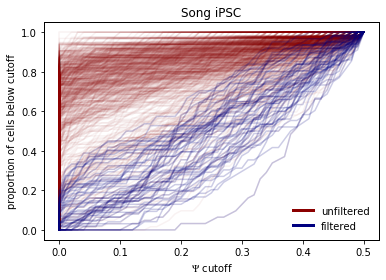

In [11]:
plot_bimodality_curves([song_curva_list_iPSC, song_curva_list_filt_iPSC], ['darkred', 'navy'], 
                       ['unfiltered', 'filtered'], ['', ''], 
                       ['-', '-'], [0.05, 0.2], 'Song iPSC',
                      plot_individual_events=True)

In [69]:
from sklearn.metrics import auc
from scipy.stats.mstats import mannwhitneyu

def compare_auc(curva_list, curva_list_2, names=['list1', 'list2'], plot=False, title = '', 
                test_stat=mannwhitneyu, print_diff=False):
    auc_list = []
    for i in range(len(curva_list)):
        auc_list.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list[i]))

    auc_list_2 = []
    for i in range(len(curva_list_2)):
        auc_list_2.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list_2[i]))
        
    if plot:
        plt.hist(auc_list, density=True, alpha=0.5, label=names[0])
        plt.hist(auc_list_2, density=True, alpha=0.5, label=names[1])
        plt.xlabel('AUC', fontsize=20)
        plt.ylabel('density', fontsize = 20)
        plt.legend(frameon=False)
        plt.title(title, fontsize = 22)
        plt.show()
        
    if print_diff:
        print(np.array(auc_list) - np.array(auc_list_2))
        if plot:
            plt.hist(np.array(auc_list) - np.array(auc_list_2), density=True, alpha=0.5, label='difference')
            plt.xlabel('AUC difference', fontsize=20)
            plt.ylabel('density', fontsize = 20)
            plt.legend(frameon=False)
            plt.title(title, fontsize = 22)
            plt.show()
        
    return test_stat(auc_list, auc_list_2)

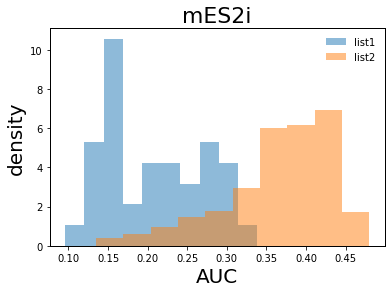

MannwhitneyuResult(statistic=1045.0, pvalue=6.370943883703726e-20)

In [55]:
compare_auc(chen_curva_list_filt_ES2i, chen_curva_list_ES2i, plot=True, title='mES2i')

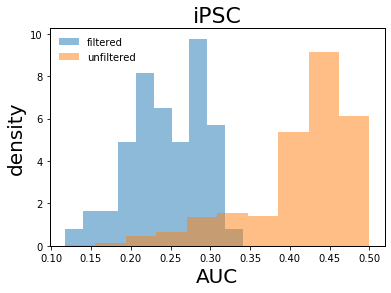

MannwhitneyuResult(statistic=1412.0, pvalue=1.7857588340773564e-29)

In [73]:
compare_auc(song_curva_list_filt_iPSC, song_curva_list_iPSC, names=['filtered', 'unfiltered'], plot=True, title='iPSC')

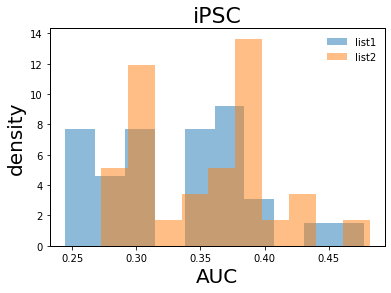

MannwhitneyuResult(statistic=283.0, pvalue=0.07540846395690613)

In [29]:
compare_auc(song_curva_list_filt_NPC, song_curva_list_unfilt_NPC, plot=True, title='iPSC')

In [33]:
chen_curva_list_1, chen_curva_list_filt_1, chen_curva_list_unfilt_1 = get_curves_dataset(chen_PSI, 
        chen_pca_clust.loc[chen_pca_clust.AC == 0].index, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_2, chen_curva_list_filt_2, chen_curva_list_unfilt_2 = get_curves_dataset(chen_PSI, 
        chen_pca_clust.loc[chen_pca_clust.AC == 1].index, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_3, chen_curva_list_filt_3, chen_curva_list_unfilt_3 = get_curves_dataset(chen_PSI, 
        chen_pca_clust.loc[chen_pca_clust.AC == 2].index, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_4, chen_curva_list_filt_4, chen_curva_list_unfilt_4 = get_curves_dataset(chen_PSI, 
        chen_pca_clust.loc[chen_pca_clust.AC == 3].index, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)

chen_curva_list_5, chen_curva_list_filt_5, chen_curva_list_unfilt_5 = get_curves_dataset(chen_PSI, 
        chen_pca_clust.loc[chen_pca_clust.AC == 4].index, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 10, cell_min = 0.5)


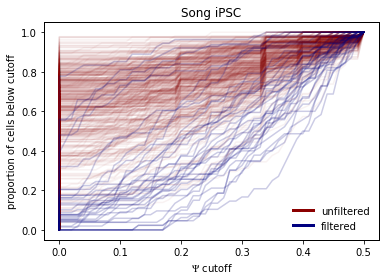

In [43]:
plot_bimodality_curves([chen_curva_list_MN, chen_curva_list_filt_MN], ['darkred', 'navy'], 
                       ['unfiltered', 'filtered'], ['', ''], 
                       ['-', '-'], [0.05, 0.2], 'Song iPSC',
                      plot_individual_events=True)

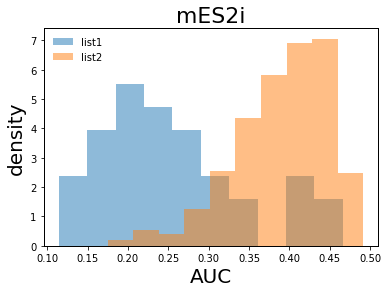

MannwhitneyuResult(statistic=2214.0, pvalue=2.7794597624675176e-13)

In [44]:
compare_auc(chen_curva_list_filt_MN, chen_curva_list_MN, plot=True, title='mES2i')

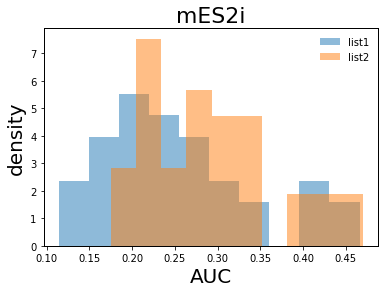

MannwhitneyuResult(statistic=461.0, pvalue=0.035692173294735736)

In [45]:
compare_auc(chen_curva_list_filt_MN, chen_curva_list_unfilt_MN, plot=True, title='mES2i')

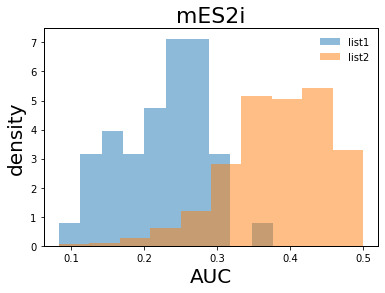

MannwhitneyuResult(statistic=1122.0, pvalue=1.1006475540855628e-22)

In [57]:
compare_auc(chen_curva_list_filt_5, chen_curva_list_5, plot=True, title='mES2i')

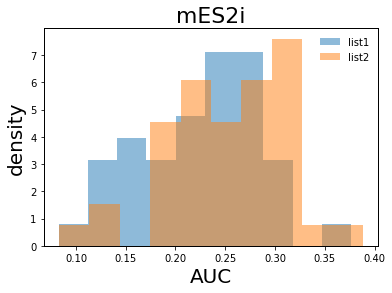

MannwhitneyuResult(statistic=685.0, pvalue=0.038986548014731705)

In [39]:
compare_auc(chen_curva_list_filt_5, chen_curva_list_unfilt_5, plot=True, title='mES2i')

In [51]:
from scipy.stats import wilcoxon
from scipy.stats import ranksums

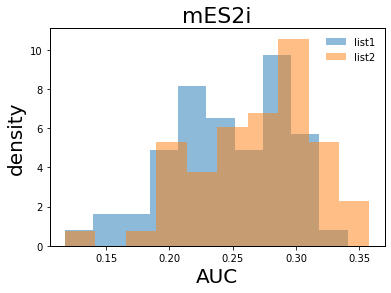

[-0.00959677 -0.00018934  0.00446237 -0.01662614 -0.03031463 -0.0043046
 -0.01947926 -0.03032086 -0.05078629 -0.00147177 -0.00964839 -0.04447581
 -0.07378495 -0.06761364 -0.03206129 -0.03321803 -0.03357419 -0.01467742
 -0.01379928 -0.02608333 -0.03055661  0.          0.         -0.00228299
 -0.04741263 -0.04721774 -0.0413178   0.          0.          0.
 -0.04261498 -0.00320705 -0.07026126 -0.05305085 -0.04439912 -0.05360531
 -0.00382602  0.         -0.01734207 -0.017125    0.          0.
 -0.04908143 -0.00194077 -0.00354985  0.         -0.0021663  -0.01336217
 -0.06373406 -0.02529789 -0.03075161 -0.0206443  -0.00974654 -0.01009793
 -0.01763279]


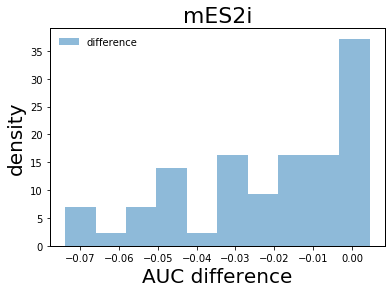

WilcoxonResult(statistic=10.0, pvalue=6.795139173719056e-09)

In [72]:
compare_auc(song_curva_list_filt_iPSC, song_curva_list_unfilt_iPSC, plot=True, title='mES2i', 
            test_stat=wilcoxon, print_diff=True)